### Attribute Information

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [152]:
heart_ds = pd.read_csv("heart.csv")

In [153]:
heart_ds.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [154]:
heart_ds.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [155]:
heart_ds.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [156]:
heart_ds.drop_duplicates().head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [157]:
heart_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [158]:
heart_ds.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Check and Separate Categorical Variables values

In [159]:
cat =[]
for col in heart_ds.select_dtypes(include ='object').columns:
    if heart_ds[col].nunique()<8:
        print(heart_ds[col].value_counts())
        print('-'*90)
        cat.append(col)
        
    

M    725
F    193
Name: Sex, dtype: int64
------------------------------------------------------------------------------------------
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
------------------------------------------------------------------------------------------
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
------------------------------------------------------------------------------------------
N    547
Y    371
Name: ExerciseAngina, dtype: int64
------------------------------------------------------------------------------------------
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
------------------------------------------------------------------------------------------


### Convert (Replace) Categorical Variables to Numeric
*    Sex :  M = 0  , F = 1
*    ChestPainType : ATA = 0 , NAP = 1, ASY = 2,  TA = 3
*    RestingECG : Normal = 0 , ST = 1, LVH = 2
*    ExerciseAngina : N = 0 , Y = 1
*    ST_Slope : Up = 0, Flat = 1, Down = 2

In [160]:
for col in cat:
    print(col)
    print((heart_ds[col].unique()),list(range(heart_ds[col].nunique())))
    heart_ds[col].replace((heart_ds[col].unique()),range(heart_ds[col].nunique()),inplace=True)
    print('-'*90)

Sex
['M' 'F'] [0, 1]
------------------------------------------------------------------------------------------
ChestPainType
['ATA' 'NAP' 'ASY' 'TA'] [0, 1, 2, 3]
------------------------------------------------------------------------------------------
RestingECG
['Normal' 'ST' 'LVH'] [0, 1, 2]
------------------------------------------------------------------------------------------
ExerciseAngina
['N' 'Y'] [0, 1]
------------------------------------------------------------------------------------------
ST_Slope
['Up' 'Flat' 'Down'] [0, 1, 2]
------------------------------------------------------------------------------------------


In [161]:
heart_ds['Cholesterol'].value_counts().head()

0      172
254     11
223     10
220     10
230      9
Name: Cholesterol, dtype: int64

### Impute the 0 values(Cholesterol) with KNN

In [162]:
from sklearn.impute import KNNImputer
heart_ds['Cholesterol'].replace(0,np.nan,inplace=True)
imputer = KNNImputer(n_neighbors=3)
after_impute=imputer.fit_transform(heart_ds)
heart_ds = pd.DataFrame(after_impute,columns = heart_ds.columns)

In [163]:
heart_ds['Cholesterol'].value_counts()

254.000000    11
220.000000    10
216.000000    10
223.000000    10
230.000000    10
              ..
221.666667     1
468.000000     1
227.666667     1
244.333333     1
131.000000     1
Name: Cholesterol, Length: 310, dtype: int64

### Change columns type to int 

In [164]:
selected_col = heart_ds.columns
selected_col = selected_col.drop('Oldpeak')
heart_ds[selected_col] = heart_ds[selected_col].astype('int32')

In [165]:
heart_ds['Cholesterol'].value_counts()

220    12
216    12
225    11
254    11
223    11
       ..
458     1
384     1
349     1
142     1
131     1
Name: Cholesterol, Length: 225, dtype: int64

### Exploratory Data Analysis

#### Find the correlation between the variables and the target variable(HeartDisease)

<Axes: >

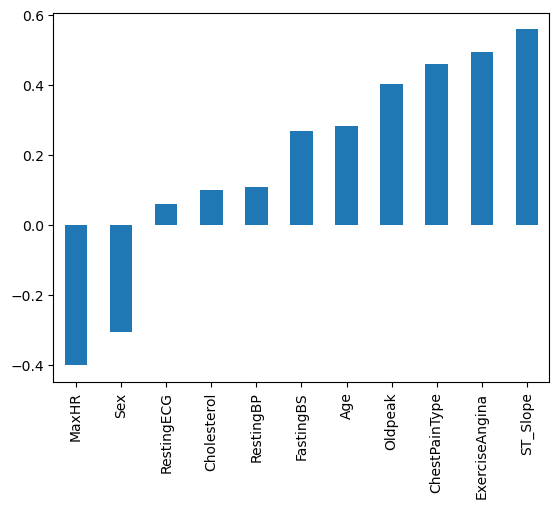

In [166]:
heart_ds.corr()['HeartDisease'][:-1].sort_values().plot(kind='bar')

### HeartDisease Percentage

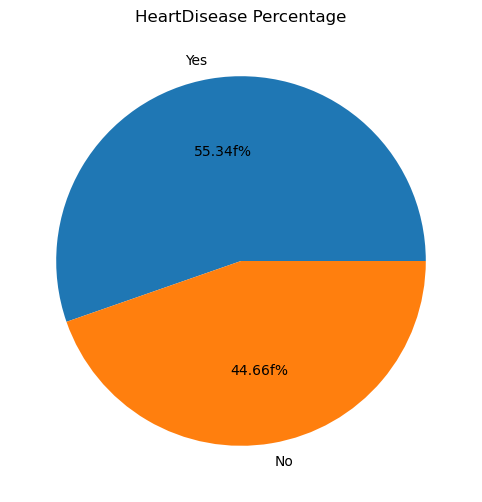

In [167]:
plt.figure(figsize=(10,6))
plt.pie(heart_ds['HeartDisease'].value_counts(),labels=['Yes','No'],autopct='%1.2ff%%')
plt.title("HeartDisease Percentage")
plt.show()

###  Gender and Heart Disease

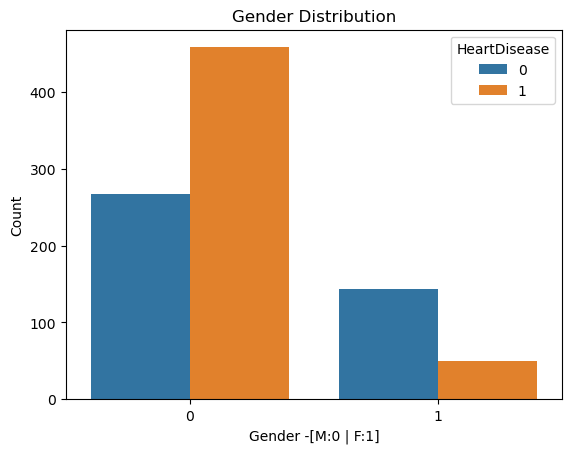

In [168]:
sns.countplot(x='Sex',data=heart_ds,hue='HeartDisease')
plt.title('Gender Distribution')
plt.xlabel('Gender -[M:0 | F:1]')
plt.ylabel('Count')
plt.show()

Countplot shows strange relation between Gender and HeartDisease.Men have a higher risk of HeartDisease

### Age Distribution

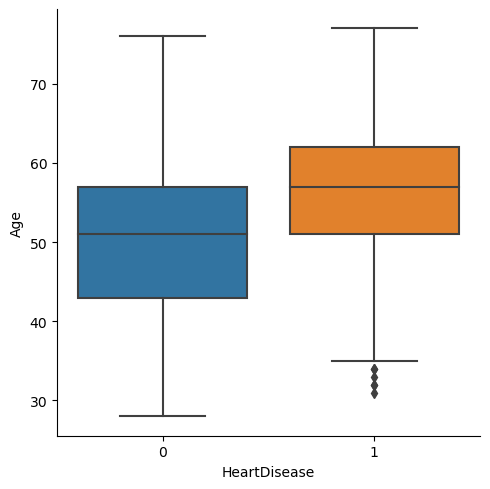

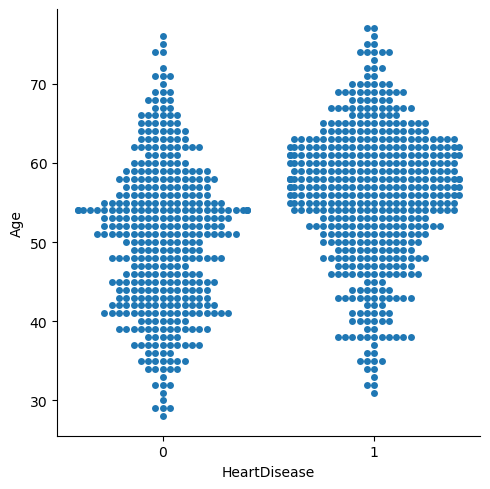

In [169]:

sns.catplot(x='HeartDisease',y='Age',kind='box',data=heart_ds)

sns.catplot(x='HeartDisease',y='Age',kind='swarm',data=heart_ds)

<Axes: xlabel='Age', ylabel='Count'>

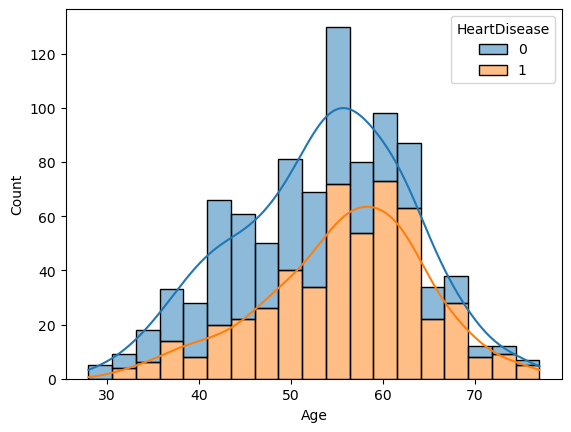

In [170]:
#histogram for age distribution
sns.histplot(data=heart_ds,x='Age',hue='HeartDisease',multiple='stack',kde=True)

### ChestPainType and Heart Disease

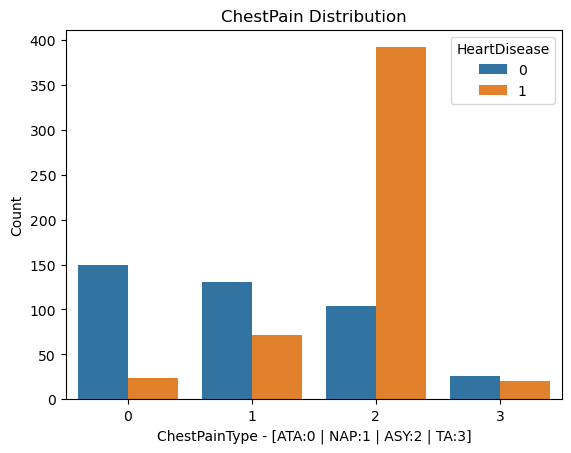

In [171]:
sns.countplot(x='ChestPainType',data=heart_ds,hue='HeartDisease')
plt.title('ChestPain Distribution')
plt.xlabel('ChestPainType - [ATA:0 | NAP:1 | ASY:2 | TA:3]')
plt.ylabel('Count')
plt.show()

Countplot shows asymptomatic's chest pain have a higher risk of HeartDisease

### FastingBS and Heart Disease

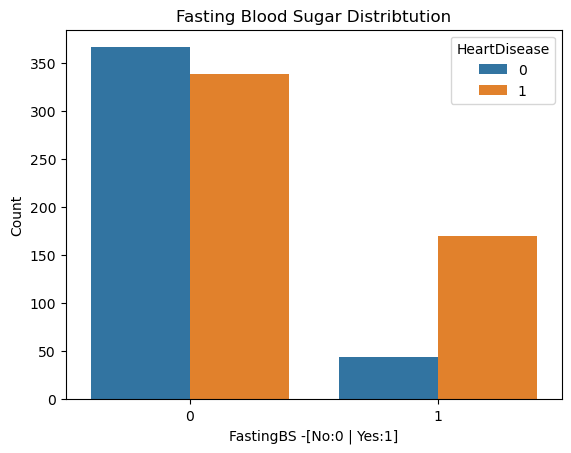

In [172]:
sns.countplot(x='FastingBS',data=heart_ds,hue='HeartDisease')
plt.title('Fasting Blood Sugar Distribtution')
plt.xlabel('FastingBS -[No:0 | Yes:1]')
plt.ylabel('Count')
plt.show()


Countplot shows FastingBS has high risk of HeartDisease

### Max Heart Rate and Heart Disease

Text(0.5, 1.0, 'Max Heart Rate Vs Heart Disease ')

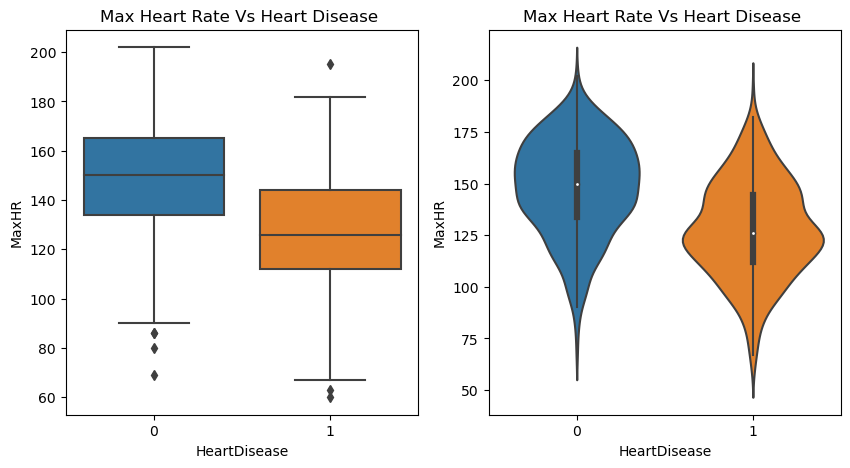

In [173]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x='HeartDisease',y='MaxHR',data=heart_ds,ax=ax[0]).set_title('Max Heart Rate Vs Heart Disease ')
sns.violinplot(x='HeartDisease',y='MaxHR',data=heart_ds,ax=ax[1]).set_title('Max Heart Rate Vs Heart Disease ')

### Oldpeak and Heart Disease

Text(0.5, 1.0, 'Oldpeak and Heart Disease')

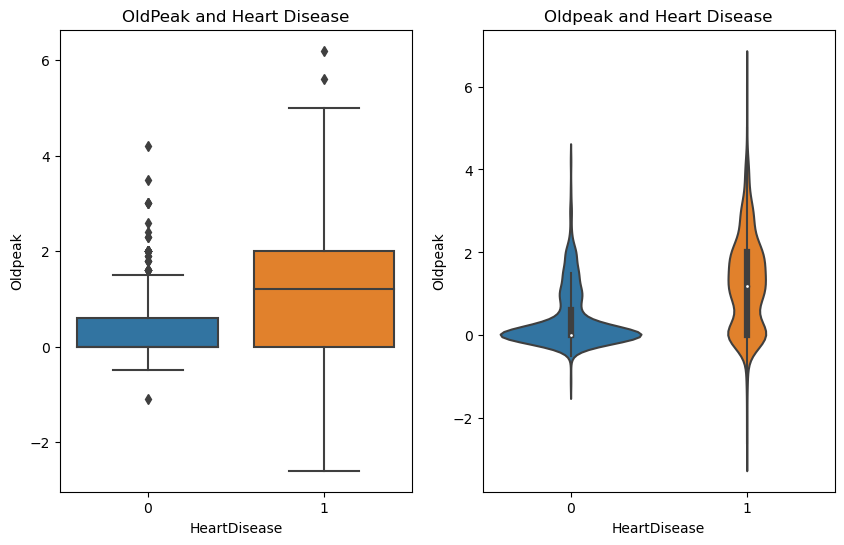

In [174]:
fig,ax = plt.subplots(1,2,figsize=(10,6))
sns.boxplot(x='HeartDisease',y='Oldpeak',data=heart_ds,ax=ax[0]).set_title('OldPeak and Heart Disease')
sns.violinplot(x='HeartDisease',y='Oldpeak',data=heart_ds,ax=ax[1]).set_title('Oldpeak and Heart Disease')

### Exercise-induced angina and Heart Disease

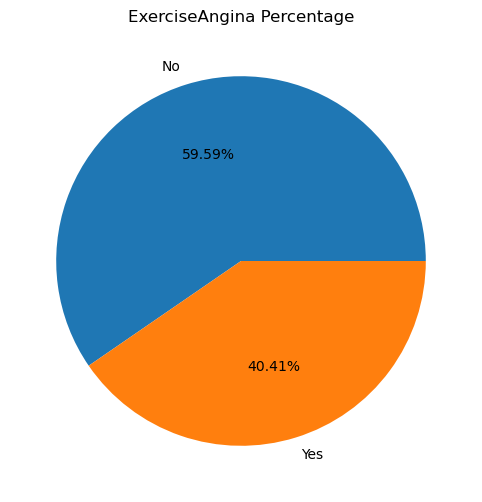

In [175]:
plt.figure(figsize=(10,6))
plt.pie(heart_ds['ExerciseAngina'].value_counts(), labels=['No','Yes'], autopct='%1.2f%%')
plt.title('ExerciseAngina Percentage')
plt.show()

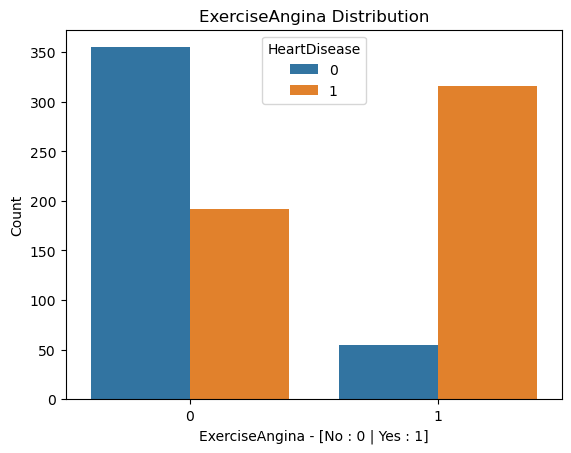

In [176]:
sns.countplot(x='ExerciseAngina',data=heart_ds,hue='HeartDisease')
plt.title('ExerciseAngina Distribution')
plt.xlabel('ExerciseAngina - [No : 0 | Yes : 1]')
plt.ylabel('Count')
plt.show()

### ST_Slope and Heart Disease

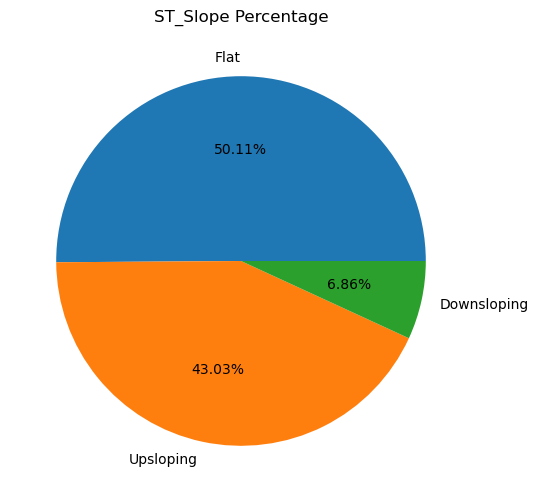

In [177]:
plt.figure(figsize=(10,6))
plt.pie(heart_ds['ST_Slope'].value_counts(),labels=['Flat','Upsloping', 'Downsloping'],autopct='%1.2f%%')
plt.title('ST_Slope Percentage')
plt.show()

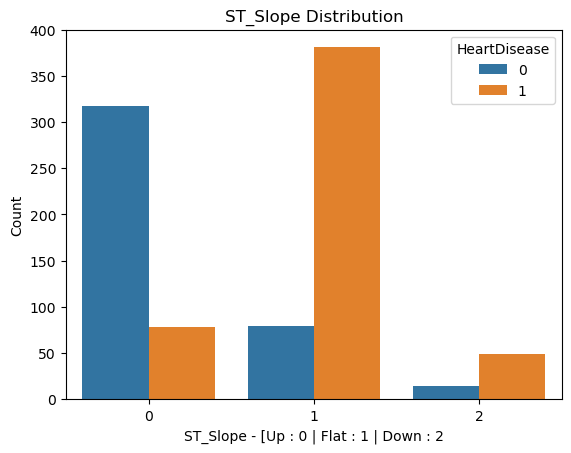

In [178]:
sns.countplot(x='ST_Slope',data=heart_ds,hue='HeartDisease')
plt.title('ST_Slope Distribution')
plt.xlabel('ST_Slope - [Up : 0 | Flat : 1 | Down : 2')
plt.ylabel('Count')
plt.show()

## Plot Heatmap

<Axes: >

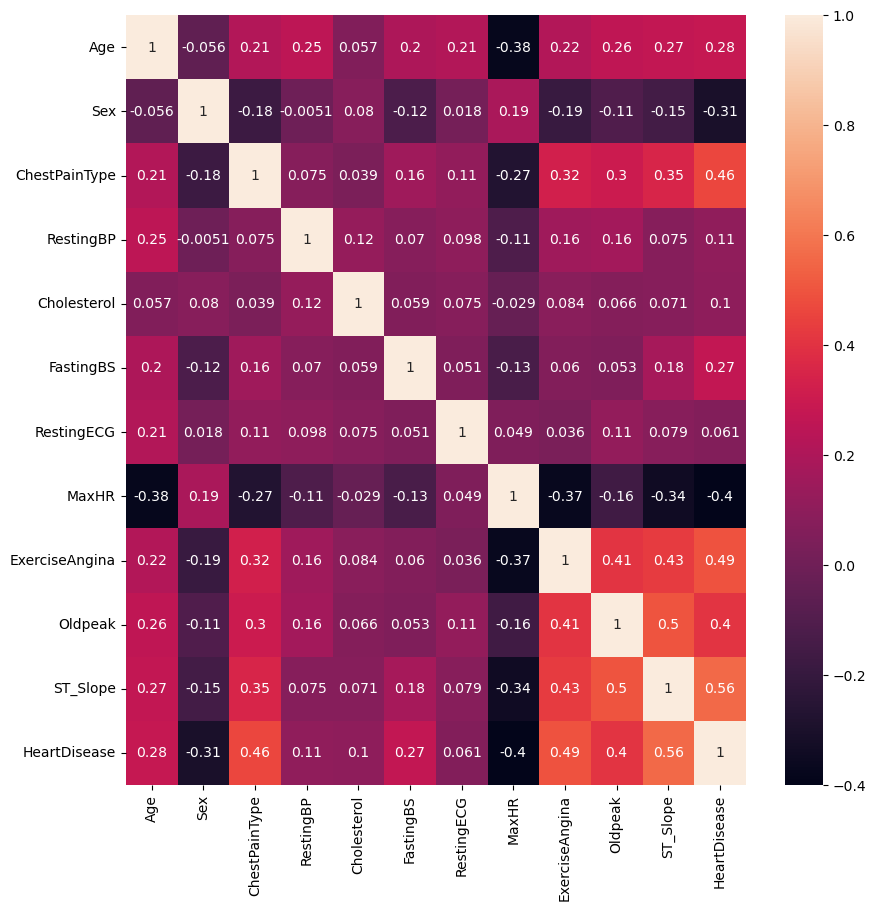

In [179]:
plt.figure(figsize=(10,10))
sns.heatmap(heart_ds.corr(),annot=True)

### Train Test Split

In [180]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(heart_ds.drop('HeartDisease',axis=1),heart_ds['HeartDisease'])

### Model Training

### Logisitc Regression

In [181]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

solver = ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']
bestsolver = ''
train_score = np.zeros(6)
for i,n in enumerate(solver):
    lr = LogisticRegression(solver = n).fit(x_train,y_train)
    train_score[i]  = lr.score(x_test,y_test)
    if lr.score(x_test,y_test) == train_score.max():
        bestsolver=n

lr = LogisticRegression(solver=bestsolver)
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
print('Logisitic Regression Score:',{accuracy_score(y_test,lr_pred)})






Logisitic Regression Score: {0.8695652173913043}


### Support Vector Machine(SVM)

In [182]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

kernels = {'linear':0, 'poly':0, 'rbf':0, 'sigmoid':0}
best = ''
for i in kernels:
    svm = SVC(kernel=i)
    svm.fit(x_train, y_train) 
    yhat = svm.predict(x_test)
    kernels[i]=f1_score(y_test, yhat, average="weighted")
    if kernels[i] == max(kernels.values()):
        best = i
svm = SVC(kernel=best)
svm.fit(x_train,y_train)
svm_pred = svm.predict(x_test)
print(f'SVM f1_score kernel({best}): {f1_score(y_test, svm_pred, average="weighted")}')


SVM f1_score kernel(linear): 0.8545692537670717


### Decision Tree Classifier

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier(class_weight='balanced')
params={
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
    
}

grid_search = GridSearchCV(dtree,params,cv=5)
grid_search.fit(x_train,y_train)
ctree = DecisionTreeClassifier(**grid_search.best_params_,class_weight='balanced')
ctree.fit(x_train,y_train)
dtc_pred = ctree.predict(x_test)
print(f'Decision Tree Accuracy:,{accuracy_score(y_test,dtc_pred)}')

Decision Tree Accuracy:,0.8608695652173913


### KNN

In [184]:
from sklearn.neighbors import KNeighborsClassifier
ks = 50
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))

for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    mean_acc[n-1]= accuracy_score(y_test,yhat)
    std_acc[n-1] = np.std(yhat ==y_test)/np.sqrt(yhat.shape[0])
    
best_k = mean_acc.argmax()+1
knn= KNeighborsClassifier(n_neighbors = best_k).fit(x_train,y_train)
knn_pred=neigh.predict(x_test)
print( "The best accuracy was ", accuracy_score(y_test, knn_pred), "with k=", mean_acc.argmax()+1) 

    

The best accuracy was  0.7217391304347827 with k= 9


### Random Forest Classifier

In [185]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier()
param={
    'n_estimators' :[25,50,100,150],
    'max_features':['sqrt','log2',None],
    'max_depth':[3,6,9],
    'max_leaf_nodes':[3,6,9]
}

grid_search = GridSearchCV(rfc,param)
grid_search.fit(x_train,y_train)
rfc_tree = RandomForestClassifier(**grid_search.best_params_)
rfc_tree.fit(x_train,y_train)
rfc_pred = rfc_tree.predict(x_test)
print("Random Forest Classifier Accuracy:",accuracy_score(y_test,rfc_pred))

Random Forest Classifier Accuracy: 0.8260869565217391


### Comparing the models

Text(0.5, 1.0, 'Comparison of different models')

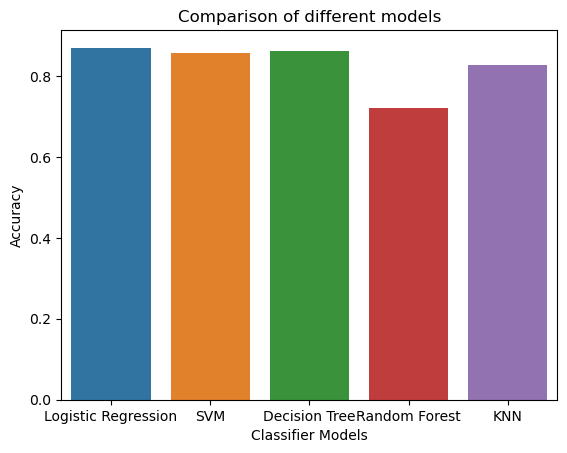

In [186]:
models = ['Logistic Regression','SVM','Decision Tree','Random Forest','KNN']
preds = [lr_pred,svm_pred,dtc_pred,knn_pred,rfc_pred]
accuracys= []
for i in preds:
    accuracys.append( accuracy_score(y_test, i))
sns.barplot(x=models, y=accuracys)
plt.xlabel('Classifier Models')
plt.ylabel('Accuracy')
plt.title('Comparison of different models')

### Conclusion

From the exploratory data analysis, I have concluded that the risk of Heart Disease depends upon the following factors:
MaxHR
Oldpeak
ChestPainType
ExerciseAngina
ST_Slope
The Logisitic Regression model performed better than other models with an accuracy of 87% . The accuracy of the model can be improved by increasing the size of the dataset. The dataset used for this project was very small and had only 918 rows.